# Introduction

The motivation for this project was to develop a supervised machine learning model to identify whether a clothing image is that of a skirt, dress, pans or shirt. Several Algorithms were used including Support Vector Machine (SVM), Random Forest, KNN as well as Ensemble methods (Voting, Boosting)

# Import Python libraries

In [18]:
# Jupyter Package
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# standard packages
## https://docs.python.org/3/library/io.html
import io
import os
import sys
import csv
import time 
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# beautiful soup packages
from bs4 import BeautifulSoup 
import requests 

# selenium packages
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import UnexpectedAlertPresentException
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select
import multiprocessing
from threading import Thread
from time import sleep, time

# image processing and features extraction packages
## https://python-guide-pt-br.readthedocs.io/fr/latest/scenarios/imaging.html
## https://docs.python.org/fr/3/library/hashlib.html
from PIL import Image, ImageOps, ImageEnhance
import os, sys
import numpy as np
import mahotas
import cv2
import h5py
import hashlib # permet de chiffrer 

# Dataset creation packages
import pickle
from mlxtend.preprocessing import shuffle_arrays_unison

# ML packages
from sklearn import mixture
from sklearn.mixture import GaussianMixture 
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.colors import LogNorm
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,MinMaxScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_error
##SVM
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix


from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


## Logistic Regression 
from sklearn.linear_model import LogisticRegression

## Decision Tree and random forest packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

## KNN 
from sklearn.neighbors import KNeighborsClassifier

##SVM
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

## Naive Bayesian
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

## Ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Téléchargement du Dataset

In [3]:
DATASETDIR='C:/Users/utilisateur/Documents/DataIA/Projet/Projet_Classification_ZARA/Datasets/'
with open(DATASETDIR+'ZARA_DataSet_models_with_HOG_all.pickle', 'rb') as data:
    dataset = pickle.load(data)  

# Informations sur le Dataset

dict_keys(['data', 'target', 'target_names', 'target_name_list', 'target_name_code', 'data_Name', 'images', 'global_features', 'hog_features', 'hog_images'])

[STATUS] Data (pixel matrix in line) size (1307, 3136)
[STATUS] Target  size (1307,)
[STATUS] Image  (Image matrix) size (1307, 56, 56)
[STATUS] global features (Image names) size (1307, 532)
[STATUS] Hog features  size (1307, 10368)
[STATUS] Hog images  size (1307, 200, 200)


Counter({'robe': 377, 't-shirt': 360, 'pantalon': 323, 'jupe': 247})

,count
robe,377
t-shirt,360
pantalon,323
jupe,247


Text(0.5, 1.0, "Nombre d'images par classes de vêtement")

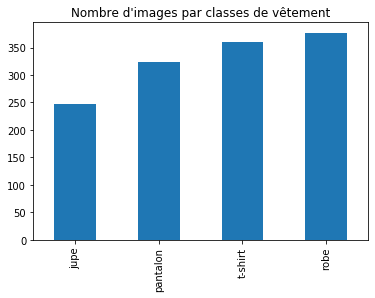

In [8]:
dataset.keys()
for key in dataset.keys():
    globals()[str(key)] =dataset[key]
    
## vérification des dimensions 
print("[STATUS] Data (pixel matrix in line) size {}".format(data.shape) )
print("[STATUS] Target  size {}".format(target.shape) )
print("[STATUS] Image  (Image matrix) size {}".format(images.shape) )
print("[STATUS] global features (Image names) size {}".format(global_features.shape) )
print("[STATUS] Hog features  size {}".format(hog_features.shape) )
print("[STATUS] Hog images  size {}".format(hog_images.shape) )
    
## Nombre de vétements par classes     
clothes_counts = Counter(target_names)
clothes_counts
df = pd.DataFrame.from_dict(clothes_counts, orient='index', columns=['count'])
df
df.sort_values(by='count', ascending= True).plot(kind='bar', legend=False)
plt.title("Nombre d'images par classes de vêtement")

# Affichage de quelques images du dataset

robe_39
robe


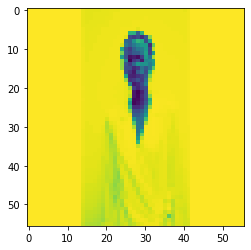

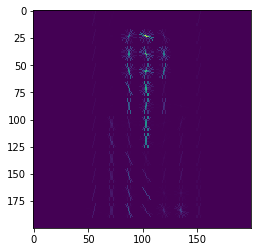

--------------
t-shirt_218
t-shirt


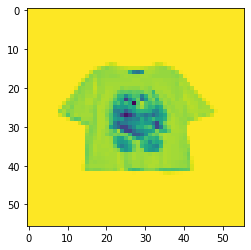

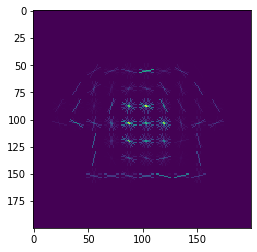

--------------
pantalon_287
pantalon


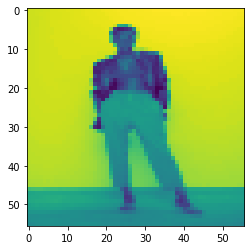

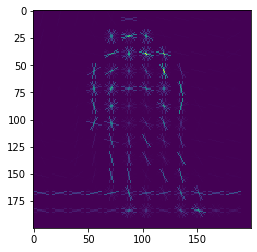

--------------
t-shirt_244
t-shirt


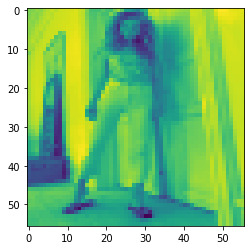

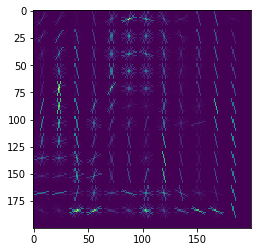

--------------
t-shirt_52
t-shirt


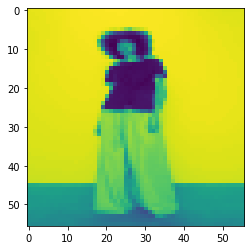

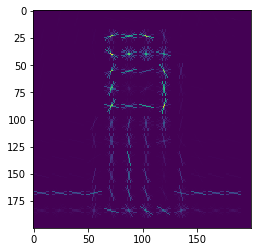

--------------
t-shirt_175
t-shirt


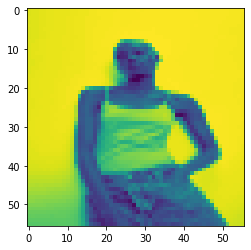

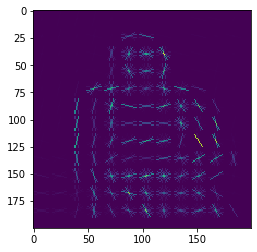

--------------


In [9]:
for i in range(0,6):
    print(data_Name[i])
    print(target_names[i])
    
    plt.imshow(images[i])
    plt.show()
    plt.imshow(hog_images[i])
    plt.show()
    print('--------------')

# train et test sets

[STATUS] X and y train size (1045, 3136)
[STATUS] X and y test size (262, 3136)
--------------


2    301
3    288
1    258
0    198
dtype: int64

2    76
3    72
1    65
0    49
dtype: int64

[]

[]

frequency %


2    28.803828
3    27.559809
1    24.688995
0    18.947368
dtype: float64

2    29.007634
3    27.480916
1    24.809160
0    18.702290
dtype: float64

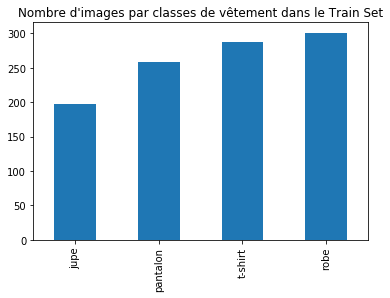

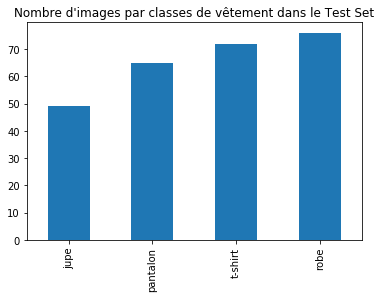

In [15]:
# stratify : return train and test that have the same proportions of class labels as the input dataset.
#X_train, X_test, y_train, y_test = train_test_split(hog_features, target, test_size=0.25, random_state=0, stratify=target)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0,stratify=target)

print("[STATUS] X and y train size {}".format(X_train.shape, y_train.shape) )
print("[STATUS] X and y test size {}".format(X_test.shape, y_test.shape) )

print('--------------')
y_train.value_counts()
y_test.value_counts()


for name,y in zip(['Train Set', 'Test Set'], [y_train, y_test]):
    #print(target_name_code)
    df = pd.DataFrame.from_dict(Counter(y), orient='index', columns=['count'])
    df=df.rename(index=target_name_code)
    df.sort_values(by='count', ascending= True).plot(kind='bar', legend=False, title="Nombre d'images par classes de vêtement dans le "+name);
print('frequency %')
y_train.value_counts(normalize=True)*100
y_test.value_counts(normalize=True)*100


# PCA 

Extracting the top 0 eigenfaces from 1045 faces
done in 3.337s
[STATUS] n components =  110
Projecting the input data on the eigenfaces orthonormal basis
done in 0.139s


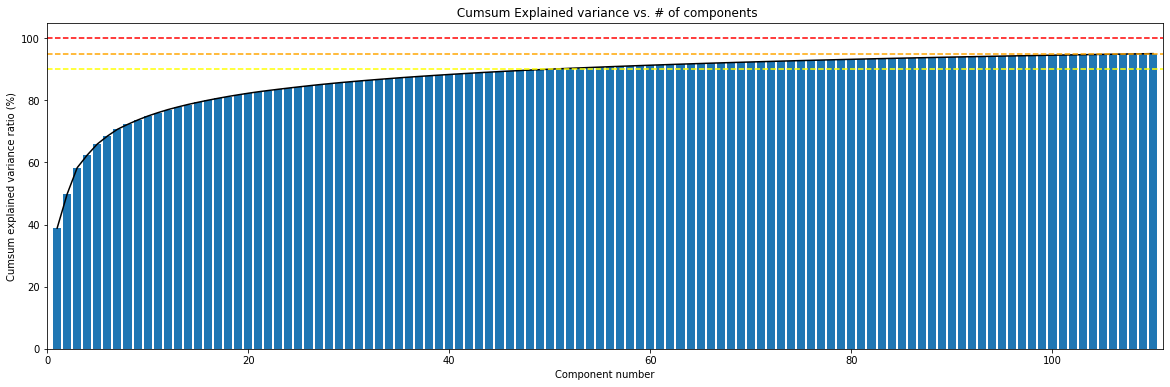

In [17]:

#--------------------
# tunable-parameters
#--------------------
n_samples, h, w = images.shape
n_components =0.95

### Scaling ## 
sc = StandardScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

### Running PCA by keeping 95% of variance explained ###
pca=PCA(n_components=n_components , svd_solver='full', whiten=True)
#pca=PCA(n_components=n_components, svd_solver='randomized', whiten=True)

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train_scaled.shape[0]))
t0 = time()

pca = pca.fit(X_train_scaled)
print("done in %0.3fs" % (time() - t0))

n_components=pca.n_components_
print("[STATUS] n components =  {}".format(n_components) )
eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("done in %0.3fs" % (time() - t0))

#cumul de variance expliquée
plt.figure(figsize=(20,6))
plt.plot(np.arange(1,n_components+1),np.cumsum(pca.explained_variance_ratio_)*100, color='black')
plt.bar(np.arange(1,n_components+1),np.cumsum(pca.explained_variance_ratio_)*100)
plt.axhline(y=90, color='yellow', linestyle='--')
plt.axhline(y=95, color='orange', linestyle='--')
plt.axhline(y=100, color='r', linestyle='--')
plt.title(" Cumsum Explained variance vs. # of components")
plt.xlim(0,n_components+1)

plt.ylabel("Cumsum explained variance ratio (%)")
plt.xlabel("Component number")
plt.show();

# Models  comparaison

### helper fonction

In [125]:
CV_score_summary={}
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=3, verbose=10):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs 
            
            # best params
        
            print("Best estimator found by grid search:")
            print(gs.best_estimator_)
            print(gs.best_params_)
            print('Best score: ', gs.best_score_)
            CV_score_summary[gs.best_estimator_]=np.mean(gs.best_score_)
        return CV_score_summary
            
    

    def score_summary(self, sort_by='mean_score'):
        d={}
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns] 

In [ ]:
helper1 = EstimatorSelectionHelper(models, tuned_params)
helper1.fit(X_train_pca, y_train)

In [64]:
# modèles avec les paramètres déterminés à partir de gridsearchCV

# modèles pour le voting 
models_voting={'SVM' : SVC(kernel= 'rbf',C=3.5564803062231287, gamma=0.022229964825261943, random_state=0),
        'GaussianNB':GaussianNB(),
        'BernouilliNB':BernoulliNB(),
        'LogR': LogisticRegression(C=1.0, penalty= 'l2', random_state=0),
        'DecisionTree': DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15, random_state=0,min_samples_split= 2),
        'RF': RandomForestClassifier(bootstrap=False, max_depth=20, random_state=0, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100),
        'KNN':KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
        'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=0),
        'GradBoost':GradientBoostingClassifier(learning_rate= 0.1, n_estimators=100,random_state=0)
            }

estimators=[(clf_name, clf) for clf_name, clf in models_voting.items()]
estimators

# models 
models={'SVM' : SVC(kernel= 'rbf',C=3.5564803062231287, gamma=0.022229964825261943, random_state=0),
        'GaussianNB':GaussianNB(),
        'BernouilliNB':BernoulliNB(),
        'LogR': LogisticRegression(C=1.0, penalty= 'l2', random_state=0),
        'DecisionTree': DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15, random_state=0,min_samples_split= 2),
        'RF': RandomForestClassifier(bootstrap=False, max_depth=20, random_state=0, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100),
        'KNN':KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
        'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=0),
        'GradBoost':GradientBoostingClassifier(learning_rate= 0.1, n_estimators=100,random_state=0),
        'Voting': VotingClassifier(estimators=estimators, voting='hard')
            }

[('SVM',
  SVC(C=3.5564803062231287, gamma=0.022229964825261943, random_state=0)),
 ('GaussianNB', GaussianNB()),
 ('BernouilliNB', BernoulliNB()),
 ('LogR', LogisticRegression(random_state=0)),
 ('DecisionTree',
  DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15, random_state=0)),
 ('RF', RandomForestClassifier(bootstrap=False, max_depth=20, random_state=0)),
 ('KNN',
  KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')),
 ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0)),
 ('GradBoost', GradientBoostingClassifier(random_state=0))]

In [107]:
 #### stocker les scores ####
accuracy_summary={} 
cv_score_summary={}
def Modelisation_and_prediction(clf, clf_name, X_train, y_train, X_test, y_test, class_names):

    
    #### training #####
    #print(clf)
    model = clf.fit(X_train, y_train)
    
    ### Evaluation avec CV ####
    cv_score=np.mean(cross_val_score(clf, X_train,y_train, cv=10))
    accuracy_score= clf.score(X_test,y_test)
    cv_score_summary[clf_name]=cv_score
    print('mean_score_CV:',cv_score )
    print('Accuracy score Test:',accuracy_score)

    ## Prediction
    y_pred = model.predict(X_test)
    ###########################
    ## Evaluation  test set  ##
    ###########################
    accuracy_summary[clf_name] =accuracy_score
    #y_pred_proba=model.predict_proba(X_test)
    print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
    print('\n')
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title("Confusion matrix {}, without normalization ".format(clf_name))
    plt.show()
    print('\n')
    print(classification_report(y_test,y_pred))
    print('------------------------------------')
    return accuracy_summary,cv_score_summary

SVM
mean_score_CV: 0.5369139194139194
Accuracy score Test: 0.5305343511450382
Number of mislabeled points out of a total 262 points : 123




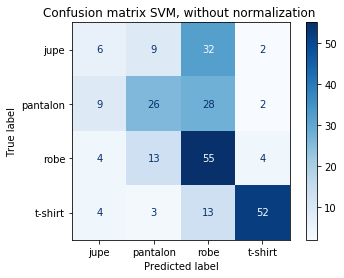



              precision    recall  f1-score   support

           0       0.26      0.12      0.17        49
           1       0.51      0.40      0.45        65
           2       0.43      0.72      0.54        76
           3       0.87      0.72      0.79        72

    accuracy                           0.53       262
   macro avg       0.52      0.49      0.49       262
weighted avg       0.54      0.53      0.52       262

------------------------------------
GaussianNB
mean_score_CV: 0.3665842490842491
Accuracy score Test: 0.35877862595419846
Number of mislabeled points out of a total 262 points : 168




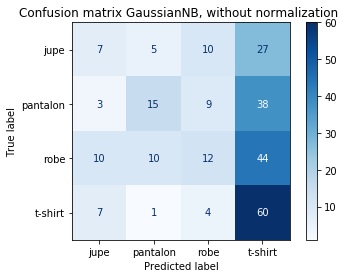



              precision    recall  f1-score   support

           0       0.26      0.14      0.18        49
           1       0.48      0.23      0.31        65
           2       0.34      0.16      0.22        76
           3       0.36      0.83      0.50        72

    accuracy                           0.36       262
   macro avg       0.36      0.34      0.30       262
weighted avg       0.37      0.36      0.31       262

------------------------------------
BernouilliNB
mean_score_CV: 0.4354120879120879
Accuracy score Test: 0.4198473282442748
Number of mislabeled points out of a total 262 points : 152




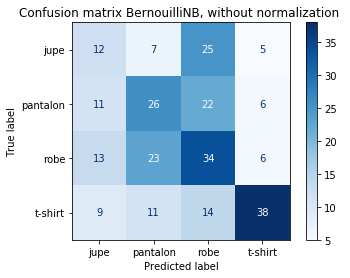



              precision    recall  f1-score   support

           0       0.27      0.24      0.26        49
           1       0.39      0.40      0.39        65
           2       0.36      0.45      0.40        76
           3       0.69      0.53      0.60        72

    accuracy                           0.42       262
   macro avg       0.43      0.41      0.41       262
weighted avg       0.44      0.42      0.43       262

------------------------------------
LogR
mean_score_CV: 0.4699175824175824
Accuracy score Test: 0.4847328244274809
Number of mislabeled points out of a total 262 points : 135




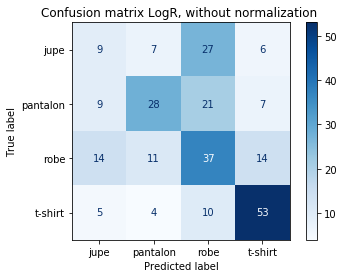



              precision    recall  f1-score   support

           0       0.24      0.18      0.21        49
           1       0.56      0.43      0.49        65
           2       0.39      0.49      0.43        76
           3       0.66      0.74      0.70        72

    accuracy                           0.48       262
   macro avg       0.46      0.46      0.46       262
weighted avg       0.48      0.48      0.48       262

------------------------------------
DecisionTree
mean_score_CV: 0.45076923076923076
Accuracy score Test: 0.4732824427480916
Number of mislabeled points out of a total 262 points : 138




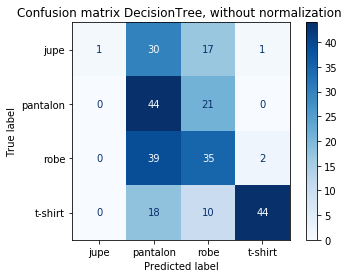



              precision    recall  f1-score   support

           0       1.00      0.02      0.04        49
           1       0.34      0.68      0.45        65
           2       0.42      0.46      0.44        76
           3       0.94      0.61      0.74        72

    accuracy                           0.47       262
   macro avg       0.67      0.44      0.42       262
weighted avg       0.65      0.47      0.45       262

------------------------------------
RF
mean_score_CV: 0.5436538461538462
Accuracy score Test: 0.5725190839694656
Number of mislabeled points out of a total 262 points : 112




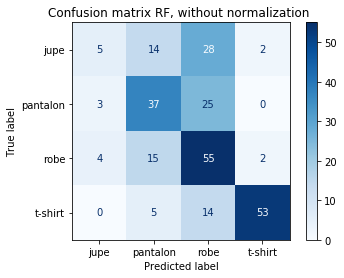



              precision    recall  f1-score   support

           0       0.42      0.10      0.16        49
           1       0.52      0.57      0.54        65
           2       0.45      0.72      0.56        76
           3       0.93      0.74      0.82        72

    accuracy                           0.57       262
   macro avg       0.58      0.53      0.52       262
weighted avg       0.59      0.57      0.55       262

------------------------------------
KNN
mean_score_CV: 0.49000000000000005
Accuracy score Test: 0.4847328244274809
Number of mislabeled points out of a total 262 points : 135




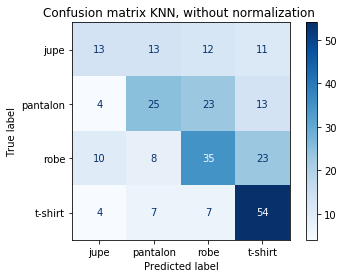



              precision    recall  f1-score   support

           0       0.42      0.27      0.33        49
           1       0.47      0.38      0.42        65
           2       0.45      0.46      0.46        76
           3       0.53      0.75      0.62        72

    accuracy                           0.48       262
   macro avg       0.47      0.47      0.46       262
weighted avg       0.47      0.48      0.47       262

------------------------------------
AdaBoost
mean_score_CV: 0.45944139194139194
Accuracy score Test: 0.4198473282442748
Number of mislabeled points out of a total 262 points : 152




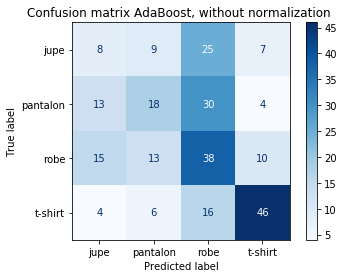



              precision    recall  f1-score   support

           0       0.20      0.16      0.18        49
           1       0.39      0.28      0.32        65
           2       0.35      0.50      0.41        76
           3       0.69      0.64      0.66        72

    accuracy                           0.42       262
   macro avg       0.41      0.39      0.39       262
weighted avg       0.42      0.42      0.42       262

------------------------------------
GradBoost
mean_score_CV: 0.5253663003663003
Accuracy score Test: 0.5267175572519084
Number of mislabeled points out of a total 262 points : 124




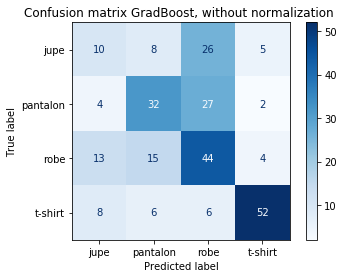



              precision    recall  f1-score   support

           0       0.29      0.20      0.24        49
           1       0.52      0.49      0.51        65
           2       0.43      0.58      0.49        76
           3       0.83      0.72      0.77        72

    accuracy                           0.53       262
   macro avg       0.52      0.50      0.50       262
weighted avg       0.53      0.53      0.52       262

------------------------------------
Voting
mean_score_CV: 0.5417216117216117
Accuracy score Test: 0.5152671755725191
Number of mislabeled points out of a total 262 points : 127




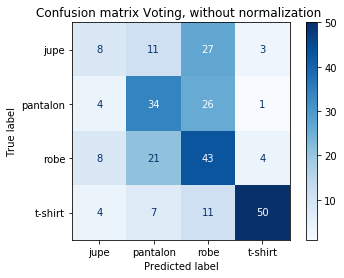



              precision    recall  f1-score   support

           0       0.33      0.16      0.22        49
           1       0.47      0.52      0.49        65
           2       0.40      0.57      0.47        76
           3       0.86      0.69      0.77        72

    accuracy                           0.52       262
   macro avg       0.52      0.49      0.49       262
weighted avg       0.53      0.52      0.51       262

------------------------------------


In [108]:
for clf_name, clf in models.items():
    print(clf_name)
    accuracy_summary,cv_score_summary = Modelisation_and_prediction(clf, clf_name, X_train_pca, y_train, X_test_pca, y_test, target_name_list)

In [66]:
accuracy_summary
cv_score_summary

{'SVM': 0.5305343511450382,
 'GaussianNB': 0.35877862595419846,
 'BernouilliNB': 0.4198473282442748,
 'LogR': 0.4847328244274809,
 'DecisionTree': 0.4732824427480916,
 'RF': 0.5725190839694656,
 'KNN': 0.4847328244274809,
 'AdaBoost': 0.4198473282442748,
 'GradBoost': 0.5267175572519084,
 'Voting': 0.5152671755725191}

{'SVM': 0.5369139194139194,
 'GaussianNB': 0.3665842490842491,
 'BernouilliNB': 0.4354120879120879,
 'LogR': 0.4699175824175824,
 'DecisionTree': 0.45076923076923076,
 'RF': 0.5436538461538462,
 'KNN': 0.49000000000000005,
 'AdaBoost': 0.45944139194139194,
 'GradBoost': 0.5253663003663003,
 'Voting': 0.5417216117216117}

In [111]:
df_accuracy_summary=pd.DataFrame.from_dict(accuracy_summary, orient='index', columns=['Test_accuracy'])
df_cv_score_summary=pd.DataFrame.from_dict(cv_score_summary, orient='index', columns=['CV_score'])

In [114]:
df_accuracy_summary.sort_values(by=['Test_accuracy'])
df_cv_score_summary.sort_values(by=['CV_score'])

,Test_accuracy
GaussianNB,0.358779
BernouilliNB,0.419847
AdaBoost,0.419847
DecisionTree,0.473282
LogR,0.484733
KNN,0.484733
Voting,0.515267
GradBoost,0.526718
SVM,0.530534
RF,0.572519


,CV_score
GaussianNB,0.366584
BernouilliNB,0.435412
DecisionTree,0.450769
AdaBoost,0.459441
LogR,0.469918
KNN,0.490000
GradBoost,0.525366
SVM,0.536914
Voting,0.541722
RF,0.543654


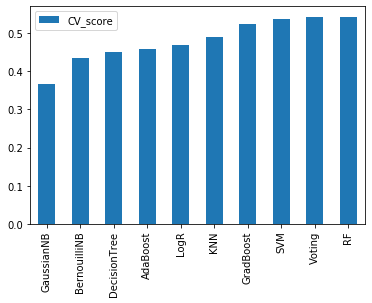

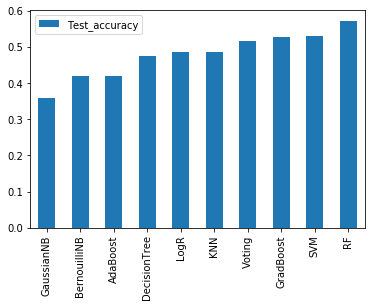

In [113]:
df_cv_score_summary.sort_values(by=['CV_score']).plot.bar(rot=90)
df_accuracy_summary.sort_values(by=['Test_accuracy']).plot.bar(rot=90)

# Predictions  with the best estimator : RF

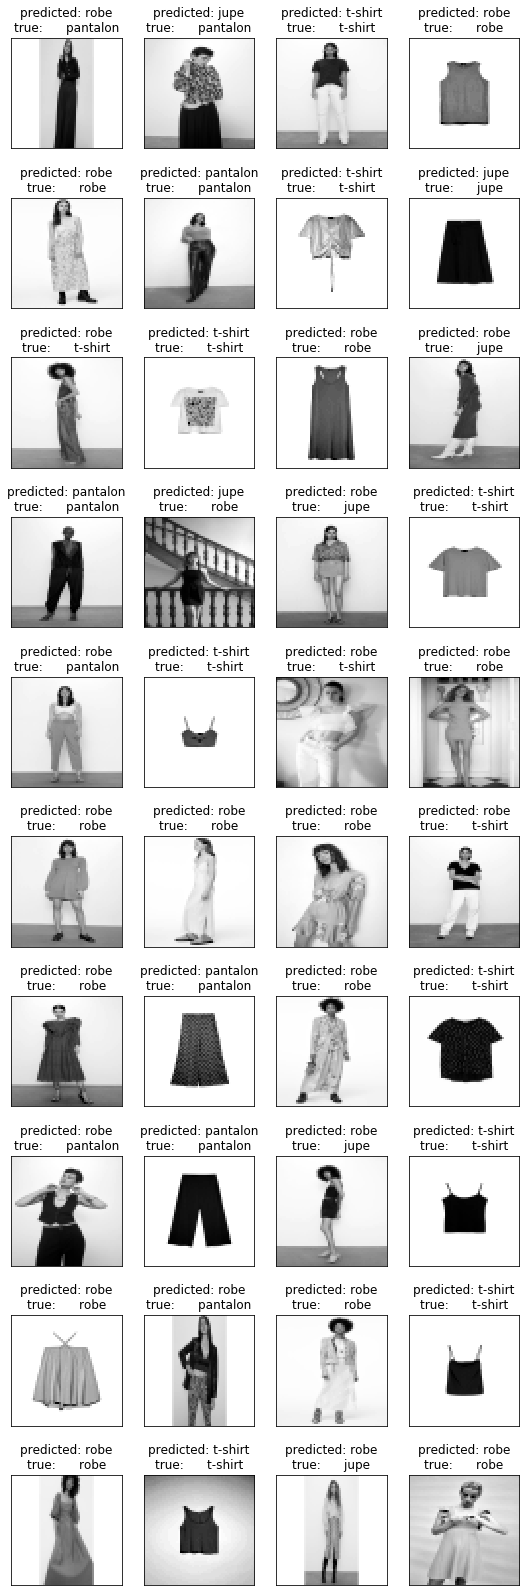

In [69]:
n_row=10; n_col=4
n_samples, h, w = images.shape

best_model = 'RF'

y_pred=models['RF'].predict(X_test_pca)


def plot_gallery(images, titles, h, w, n_row=n_row, n_col=n_col):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray) # 
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, np.array(y_test), target_name_list, i) for i in range(y_test.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# ROC curves

In [117]:
def plot_ROC(clf, X_train,X_test,y_train,y_test):
    y_score = clf.fit(X_train,y_train).predict_proba(X_test)
       #Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0,1, 2, 3])
    n_classes = y_test_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()


    colors = cycle(['aqua', 'darkorange', 'gold','limegreen'])
    for i, color in zip(range(n_classes), colors):      
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0}'
             ''.format(target_name_list[i]))
        print('AUC for Class {}: {}'.format(target_name_list[i], auc(fpr[i], tpr[i])))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curves')
    plt.legend(loc="lower right")
    plt.show()

AUC for Class jupe: 0.6799367634377694
AUC for Class pantalon: 0.8061304178055446
AUC for Class robe: 0.7571095076400678
AUC for Class t-shirt: 0.9102704678362573


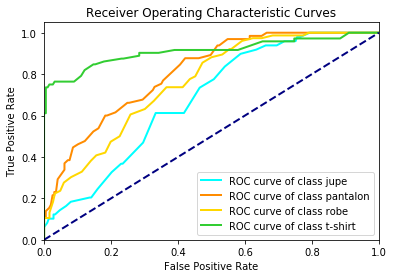

In [118]:
clf=models['RF']
plot_ROC(clf, X_train_pca,X_test_pca,y_train,y_test)

In [ ]:
=> beaucoup de jupes sont prédites comme étant des robes et inversement 
=> beaucoup de pantalons sont prédits comme étant robes et inversement 
=> tshirts prédits comme  étant robes 

# Global features  : https://gogul.dev/software/image-classification-python
Les caractéristiques globales sont calculées sur toute l'image :
- histogramme de couleur :  Il représente la distribution globale des couleurs dans l'image.
- hu moments : Les moments Hu (ou plutôt les invariants des moments Hu) sont un ensemble de 7 nombres calculés en utilisant des moments centraux invariants aux transformations d'image. Les 6 premiers moments se sont révélés invariants à la translation, à l'échelle, à la rotation et à la réflexion. Alors que le signe du 7ème moment change pour la réflexion de l'image => forme de l'object 
- haralick :  Pour rendre compte de la texture 

In [119]:
global_features.shape

(1307, 532)

## train/ test

In [120]:
gf_train, gf_test, gf_y_train, gf_y_test = train_test_split(global_features, target, test_size=0.2, random_state=0,stratify=target)
print('--------------')
gf_y_train.value_counts()
gf_y_test.value_counts()


--------------


2    301
3    288
1    258
0    198
dtype: int64

2    76
3    72
1    65
0    49
dtype: int64

## scaling

In [139]:
# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_gf_train = scaler.fit_transform(gf_train)
rescaled_gf_test = scaler.transform(gf_test)
print("[STATUS] feature vector normalized...")

[STATUS] feature vector normalized...


## Détermination du meilleur modèle

In [141]:
random_state=0
models={'SVM':SVC(random_state=random_state),
        'SVM_poly':SVC(random_state=random_state),
        'LogisticRegression':LogisticRegression(random_state=random_state),
    'DecisionTree':DecisionTreeClassifier(random_state=random_state),
    'RandomForest':RandomForestClassifier(random_state=random_state),
    'KNN':KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=random_state),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=random_state)
        
}

NaibeBayesian_models= {'GaussianBayesian':GaussianNB(),
                'CNbayesian':ComplementNB(),
                'BernouiiliBayesian':BernoulliNB(),
                'MultinomialBayesian':MultinomialNB()}

tuned_params={ 'SVM':  {'C': np.logspace(-2,2,30), 'gamma': np.logspace(-3,3,50), 'kernel': ['rbf']}, 
    'SVM_poly': {'C': np.logspace(-2,2,30), 'degree': list(range(1,6)) , 'kernel': ['poly']},
    'LogisticRegression': {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
    'DecisionTree':{'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth':range(3,20) },
    'RandomForest':{'n_estimators' : list(range(10,101,10)),  'max_features': ['auto', 'sqrt'],  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "min_samples_split" : [2,4,8], "bootstrap": [True, False], 'min_samples_leaf': [1, 2, 4] },
    'KNN':{'n_neighbors': range(1,8),'weights':['uniform','distance'],'metric':['minkowski','euclidean', 'manhattan']},
    'AdaBoostClassifier': {'n_estimators': [50,100]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100], 'learning_rate': [0.1,0.5]}    
}

C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.533, total=   2.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................................... , score=0.495, total=   2.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] .................................... , score=0.543, total=   2.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s


[CV] .................................... , score=0.467, total=   2.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s remaining:    0.0s


[CV] .................................... , score=0.486, total=   2.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s remaining:    0.0s


[CV] .................................... , score=0.481, total=   2.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.1s remaining:    0.0s


[CV] .................................... , score=0.529, total=   2.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.1s remaining:    0.0s


[CV] .................................... , score=0.577, total=   2.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.3s remaining:    0.0s


[CV] .................................... , score=0.442, total=   1.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.2s remaining:    0.0s


[CV] .................................... , score=0.519, total=   1.8s
SVM: 0.507189 (0.038192)
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.1s finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.533, total=   1.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .................................... , score=0.495, total=   1.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] .................................... , score=0.543, total=   2.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s remaining:    0.0s


[CV] .................................... , score=0.467, total=   2.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.2s remaining:    0.0s


[CV] .................................... , score=0.486, total=   2.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.6s remaining:    0.0s


[CV] .................................... , score=0.481, total=   2.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.8s remaining:    0.0s


[CV] .................................... , score=0.529, total=   2.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.9s remaining:    0.0s


[CV] .................................... , score=0.577, total=   2.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.1s remaining:    0.0s


[CV] .................................... , score=0.442, total=   2.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.3s remaining:    0.0s


[CV] .................................... , score=0.519, total=   2.2s
SVM_poly: 0.507189 (0.038192)
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.581, total=   0.4s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer

[CV] .................................... , score=0.467, total=   0.4s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV] .................................... , score=0.514, total=   0.6s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV] .................................... , score=0.533, total=   0.7s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s


[CV] .................................... , score=0.486, total=   0.5s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s


[CV] .................................... , score=0.490, total=   0.5s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.5s remaining:    0.0s


[CV] .................................... , score=0.548, total=   0.5s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.1s remaining:    0.0s


[CV] .................................... , score=0.596, total=   0.5s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.5s remaining:    0.0s


[CV] .................................... , score=0.481, total=   0.4s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.1s finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurre

[CV] .................................... , score=0.567, total=   0.6s
LogisticRegression: 0.526364 (0.043339)
[CV]  ................................................................
[CV] .................................... , score=0.457, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV]  ................................................................
[CV] .................................... , score=0.371, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .................................... , score=0.390, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.476, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s


[CV] .................................... , score=0.505, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s


[CV] .................................... , score=0.413, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s


[CV] .................................... , score=0.433, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.7s remaining:    0.0s


[CV] .................................... , score=0.567, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.9s remaining:    0.0s


[CV] .................................... , score=0.462, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.2s remaining:    0.0s


[CV] .................................... , score=0.567, total=   0.3s
DecisionTree: 0.464231 (0.063810)
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.590, total=   1.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.505, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] .................................... , score=0.600, total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV] .................................... , score=0.552, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s


[CV] .................................... , score=0.562, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.2s remaining:    0.0s


[CV] .................................... , score=0.519, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.4s remaining:    0.0s


[CV] .................................... , score=0.606, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.6s remaining:    0.0s


[CV] .................................... , score=0.663, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.8s remaining:    0.0s


[CV] .................................... , score=0.519, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.0s remaining:    0.0s


[CV] .................................... , score=0.529, total=   1.5s
RandomForest: 0.564606 (0.047459)
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.5s finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.457, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .................................... , score=0.467, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... , score=0.429, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] .................................... , score=0.410, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


[CV] .................................... , score=0.448, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s remaining:    0.0s


[CV] .................................... , score=0.433, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.9s remaining:    0.0s


[CV] .................................... , score=0.462, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.4s remaining:    0.0s


[CV] .................................... , score=0.596, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.9s remaining:    0.0s


[CV] .................................... , score=0.433, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.4s remaining:    0.0s


[CV] .................................... , score=0.500, total=   0.5s
KNN: 0.463260 (0.050266)
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.0s finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.486, total=   2.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] .................................... , score=0.552, total=   4.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


[CV] .................................... , score=0.467, total=   3.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.3s remaining:    0.0s


[CV] .................................... , score=0.467, total=   2.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.8s remaining:    0.0s


[CV] .................................... , score=0.495, total=   3.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.9s remaining:    0.0s


[CV] .................................... , score=0.510, total=   4.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.9s remaining:    0.0s


[CV] .................................... , score=0.558, total=   3.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.3s remaining:    0.0s


[CV] .................................... , score=0.577, total=   4.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.7s remaining:    0.0s


[CV] .................................... , score=0.394, total=   2.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.2s remaining:    0.0s


[CV] .................................... , score=0.606, total=   3.1s
AdaBoostClassifier: 0.511090 (0.059729)
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.3s finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.571, total=  25.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.4s remaining:    0.0s


[CV] .................................... , score=0.505, total=  27.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.3s remaining:    0.0s


[CV] .................................... , score=0.514, total=  25.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV] .................................... , score=0.505, total=  24.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s


[CV] .................................... , score=0.629, total=  28.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s


[CV] .................................... , score=0.519, total=  22.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.6min remaining:    0.0s


[CV] .................................... , score=0.596, total=  26.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.0min remaining:    0.0s


[CV] .................................... , score=0.692, total=  27.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.5min remaining:    0.0s


[CV] .................................... , score=0.490, total=  31.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.0min remaining:    0.0s


[CV] .................................... , score=0.673, total=  24.2s
GradientBoostingClassifier: 0.569496 (0.070873)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.4min finished


Text(0.5, 0.98, 'Machine Learning algorithm comparison')

NameError: name 'pyplot' is not defined

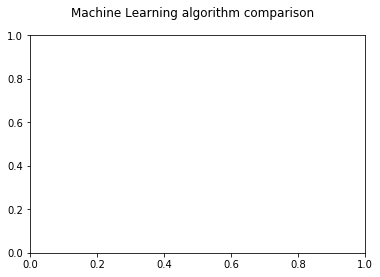

In [149]:
from sklearn.model_selection import KFold, StratifiedKFold
results_gf={}
scoring    = "accuracy"
# 10-fold cross validation
for name, model in models.items():
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, rescaled_gf_train , gf_y_train, cv=kfold, verbose=10, scoring=scoring)
    results_gf[name]=np.mean(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



In [162]:
df_results_gf=pd.DataFrame.from_dict(results_gf, orient='index', columns=['CV_score'])
df_results_gf

,CV_score
SVM,0.507189
SVM_poly,0.507189
LogisticRegression,0.526364
DecisionTree,0.464231
RandomForest,0.564606
KNN,0.463260
AdaBoostClassifier,0.511090
GradientBoostingClassifier,0.569496


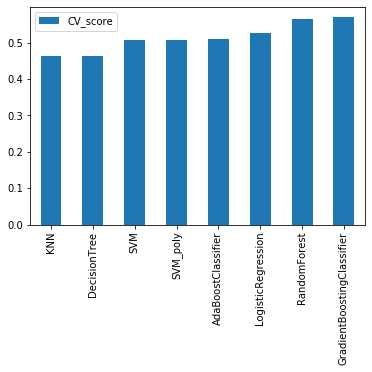

In [163]:
df_results_gf.sort_values(by=['CV_score']).plot.bar(rot=90)

In [154]:
results_gf

{'SVM': 0.5071886446886447,
 'SVM_poly': 0.5071886446886447,
 'LogisticRegression': 0.5263644688644689,
 'DecisionTree': 0.4642307692307693,
 'RandomForest': 0.5646062271062272,
 'KNN': 0.46326007326007324,
 'AdaBoostClassifier': 0.5110897435897436,
 'GradientBoostingClassifier': 0.569496336996337}

mean_score_CV: 0.5657234432234433
Accuracy score Test: 0.5687022900763359
Number of mislabeled points out of a total 262 points : 113




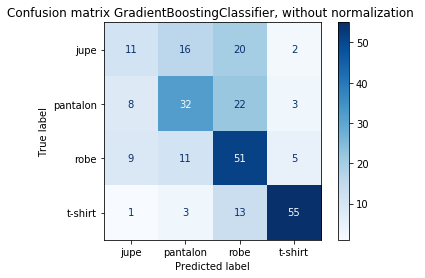



              precision    recall  f1-score   support

           0       0.38      0.22      0.28        49
           1       0.52      0.49      0.50        65
           2       0.48      0.67      0.56        76
           3       0.85      0.76      0.80        72

    accuracy                           0.57       262
   macro avg       0.56      0.54      0.54       262
weighted avg       0.57      0.57      0.56       262

------------------------------------


In [165]:
clf_name='GradientBoostingClassifier'
clf=models[clf_name]               
accuracy_summary,cv_score_summary = Modelisation_and_prediction(clf, clf_name, rescaled_gf_train, gf_y_train, rescaled_gf_test, gf_y_test, target_name_list)

# HOG features  : https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
L'idée importante derrière le descripteur HOG est que l'apparence et la forme locale d'un objet dans une image peuvent être décrites par la distribution de l'intensité du gradient ou la direction des contours. Ceci peut être fait en divisant l'image en régions adjacentes de petite taille, appelées cellules, et en calculant pour chaque cellule l'histogramme des directions du gradient ou des orientations des contours pour les pixels à l'intérieur de cette cellule. La combinaison des histogrammes forme alors le descripteur HOG. Pour de meilleurs résultats, les histogrammes locaux sont normalisés en contraste, en calculant une mesure de l'intensité sur des zones plus larges que les cellules, appelées des blocs, et en utilisant cette valeur pour normaliser toutes les cellules du bloc. Cette normalisation permet une meilleure résistance aux changements d'illuminations et aux ombres. 

In [168]:
hog_features.shape
hog_images.shape

(1307, 10368)

(1307, 200, 200)

In [ ]:
for i in range(0,6):
    print(data_Name[i])
    print(target_names[i])
    
    plt.imshow(images[i])
    plt.show()
    plt.imshow(hog_images[i])
    plt.show()
    print('--------------')

## train/test

In [179]:
HOG_X_train, HOG_X_test, HOG_y_train, HOG_y_test = train_test_split(hog_features, target, test_size=0.25, random_state=0, stratify=target)
print("[STATUS] X and y train size {}".format(HOG_X_train.shape, HOG_y_train.shape) )
print("[STATUS] X and y test size {}".format(HOG_X_test.shape, HOG_y_test.shape) )

print('--------------')
HOG_y_train.value_counts()
HOG_y_test.value_counts()

[STATUS] X and y train size (980, 10368)
[STATUS] X and y test size (327, 10368)
--------------


2    283
3    270
1    242
0    185
dtype: int64

2    94
3    90
1    81
0    62
dtype: int64

## PCA

done in 5.782s
[STATUS] n components =  406
Projecting the input data on the eigenfaces orthonormal basis
done in 0.438s


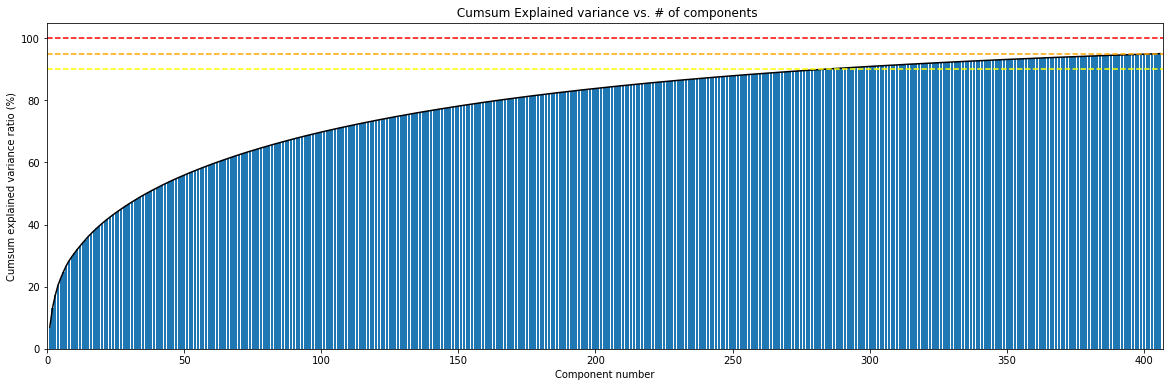

In [180]:

#--------------------
# tunable-parameters
#--------------------
n_samples, h, w = hog_images.shape

### Scaling ## 
sc = StandardScaler().fit(HOG_X_train)
HOG_X_train_scaled = sc.transform(HOG_X_train)
HOG_X_test_scaled = sc.transform(HOG_X_test)

### Running PCA by keeping 95% of variance explained ###
pca=PCA(n_components=0.95 , svd_solver='full', whiten=True)

#pca=PCA(n_components=n_components, svd_solver='randomized', whiten=True)

#print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train_scaled.shape[0]))
t0 = time()

pca = pca.fit(HOG_X_train_scaled)
print("done in %0.3fs" % (time() - t0))
n_components=pca.n_components_

print("[STATUS] n components =  {}".format(n_components) )
#eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
HOG_X_train_pca = pca.transform(HOG_X_train_scaled)
HOG_X_test_pca = pca.transform(HOG_X_test_scaled)
print("done in %0.3fs" % (time() - t0))

#cumul de variance expliquée
plt.figure(figsize=(20,6))
plt.plot(np.arange(1,n_components+1),np.cumsum(pca.explained_variance_ratio_)*100, color='black')
plt.bar(np.arange(1,n_components+1),np.cumsum(pca.explained_variance_ratio_)*100)
plt.axhline(y=90, color='yellow', linestyle='--')
plt.axhline(y=95, color='orange', linestyle='--')
plt.axhline(y=100, color='r', linestyle='--')
plt.title(" Cumsum Explained variance vs. # of components")
plt.xlim(0,n_components+1)

plt.ylabel("Cumsum explained variance ratio (%)")
plt.xlabel("Component number")
plt.show();

## Détermination du meilleur modèle

In [185]:
models={'SVM':SVC(random_state=random_state),
        'SVM_poly':SVC(random_state=random_state),
        'LogisticRegression':LogisticRegression(random_state=random_state),
    'DecisionTree':DecisionTreeClassifier(random_state=random_state),
    'RandomForest':RandomForestClassifier(random_state=random_state),
    'KNN':KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=random_state),
    #'GradientBoostingClassifier': GradientBoostingClassifier()
        
}


from sklearn.model_selection import KFold, StratifiedKFold
cv_results_HOG={}
scoring    = "accuracy"
# 10-fold cross validation
for name, model in models.items():
    print(name)
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, HOG_X_train , HOG_y_train, cv=kfold, verbose=10, scoring=scoring)
    results_HOG[name]=np.mean(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('----------------')


SVM
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.653, total=  21.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.2s remaining:    0.0s


[CV] .................................... , score=0.673, total=  18.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.4s remaining:    0.0s


[CV] .................................... , score=0.673, total=  18.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.7s remaining:    0.0s


[CV] .................................... , score=0.602, total=  19.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV] .................................... , score=0.684, total=  20.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s


[CV] .................................... , score=0.602, total=  20.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.0min remaining:    0.0s


[CV] .................................... , score=0.592, total=  24.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.4min remaining:    0.0s


[CV] .................................... , score=0.704, total=  26.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.8min remaining:    0.0s


[CV] .................................... , score=0.663, total=  27.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.3min remaining:    0.0s


[CV] .................................... , score=0.653, total=  26.7s
SVM: 0.650000 (0.036521)
----------------
SVM_poly
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.7min finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.653, total=  23.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.2s remaining:    0.0s


[CV] .................................... , score=0.673, total=  27.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   50.4s remaining:    0.0s


[CV] .................................... , score=0.673, total=  26.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV] .................................... , score=0.602, total=  28.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s


[CV] .................................... , score=0.684, total=  24.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s


[CV] .................................... , score=0.602, total=  24.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.6min remaining:    0.0s


[CV] .................................... , score=0.592, total=  25.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.0min remaining:    0.0s


[CV] .................................... , score=0.704, total=  28.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.5min remaining:    0.0s


[CV] .................................... , score=0.663, total=  22.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.8min remaining:    0.0s


[CV] .................................... , score=0.653, total=  25.9s
SVM_poly: 0.650000 (0.036521)
----------------
LogisticRegression
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.3min finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVE

[CV] .................................... , score=0.612, total=   5.0s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.2s remaining:    0.0s


[CV] .................................... , score=0.663, total=   6.3s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s remaining:    0.0s


[CV] .................................... , score=0.653, total=   7.5s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.7s remaining:    0.0s


[CV] .................................... , score=0.531, total=   4.9s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.8s remaining:    0.0s


[CV] .................................... , score=0.684, total=   4.1s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.4s remaining:    0.0s


[CV] .................................... , score=0.622, total=   3.6s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   36.6s remaining:    0.0s


[CV] .................................... , score=0.571, total=   5.2s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   40.8s remaining:    0.0s


[CV] .................................... , score=0.673, total=   4.2s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   44.5s remaining:    0.0s


[CV] .................................... , score=0.684, total=   3.7s
[CV]  ................................................................


C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   48.0s finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurre

[CV] .................................... , score=0.582, total=   3.5s
LogisticRegression: 0.627551 (0.050249)
----------------
DecisionTree
[CV]  ................................................................
[CV] .................................... , score=0.480, total=  13.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s


[CV] .................................... , score=0.531, total=  20.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.3s remaining:    0.0s


[CV] .................................... , score=0.439, total=  15.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.3s remaining:    0.0s


[CV] .................................... , score=0.469, total=  16.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV] .................................... , score=0.510, total=  19.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s


[CV] .................................... , score=0.561, total=  23.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.8min remaining:    0.0s


[CV] .................................... , score=0.449, total=  23.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.2min remaining:    0.0s


[CV] .................................... , score=0.643, total=  21.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.5min remaining:    0.0s


[CV] .................................... , score=0.551, total=  19.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.9min remaining:    0.0s


[CV] .................................... , score=0.439, total=  19.1s
DecisionTree: 0.507143 (0.062245)
----------------
RandomForest
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.2min finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.704, total=  13.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV] .................................... , score=0.694, total=   9.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.7s remaining:    0.0s


[CV] .................................... , score=0.643, total=  10.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   33.0s remaining:    0.0s


[CV] .................................... , score=0.571, total=   9.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   42.7s remaining:    0.0s


[CV] .................................... , score=0.643, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   51.8s remaining:    0.0s


[CV] .................................... , score=0.622, total=   9.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


[CV] .................................... , score=0.592, total=  11.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


[CV] .................................... , score=0.673, total=  18.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.5min remaining:    0.0s


[CV] .................................... , score=0.745, total=  11.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.7min remaining:    0.0s


[CV] .................................... , score=0.541, total=  11.4s
RandomForest: 0.642857 (0.060195)
----------------
KNN
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.582, total=   7.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV] .................................... , score=0.684, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.1s remaining:    0.0s


[CV] .................................... , score=0.571, total=   7.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.2s remaining:    0.0s


[CV] .................................... , score=0.480, total=   7.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.1s remaining:    0.0s


[CV] .................................... , score=0.633, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   39.8s remaining:    0.0s


[CV] .................................... , score=0.592, total=   9.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   49.4s remaining:    0.0s


[CV] .................................... , score=0.582, total=   9.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   59.2s remaining:    0.0s


[CV] .................................... , score=0.602, total=  10.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s


[CV] .................................... , score=0.612, total=   8.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV] .................................... , score=0.582, total=   9.0s
KNN: 0.591837 (0.048937)
----------------
AdaBoostClassifier
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished
C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.449, total= 2.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] .................................... , score=0.510, total= 1.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] .................................... , score=0.439, total= 1.8min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.4min remaining:    0.0s


[CV] .................................... , score=0.429, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.1min remaining:    0.0s


[CV] .................................... , score=0.429, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.4min remaining:    0.0s


[CV] .................................... , score=0.520, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 11.1min remaining:    0.0s


[CV] .................................... , score=0.439, total= 1.9min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 13.0min remaining:    0.0s


[CV] .................................... , score=0.561, total= 1.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 14.7min remaining:    0.0s


[CV] .................................... , score=0.571, total= 2.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 16.7min remaining:    0.0s


[CV] .................................... , score=0.480, total= 2.3min
AdaBoostClassifier: 0.482653 (0.052041)
----------------


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 19.0min finished


In [187]:
results_HOG

{'SVM': 0.65,
 'SVM_poly': 0.65,
 'LogisticRegression': 0.6275510204081632,
 'DecisionTree': 0.5071428571428571,
 'RandomForest': 0.6428571428571429,
 'KNN': 0.5918367346938777,
 'AdaBoostClassifier': 0.4826530612244898}

In [190]:
df_results_HOG=pd.DataFrame.from_dict(results_HOG, orient='index', columns=['CV_score'])
df_results_HOG

,CV_score
SVM,0.650000
SVM_poly,0.650000
LogisticRegression,0.627551
DecisionTree,0.507143
RandomForest,0.642857
KNN,0.591837
AdaBoostClassifier,0.482653


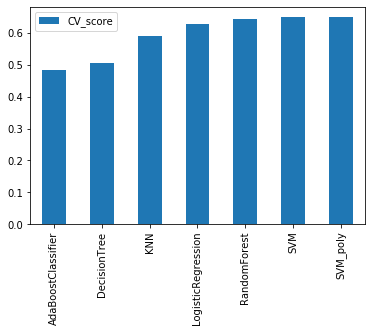

In [191]:
df_results_HOG.sort_values(by=['CV_score']).plot.bar(rot=90)

mean_score_CV: 0.65
Accuracy score Test: 0.6513761467889908
Number of mislabeled points out of a total 327 points : 114




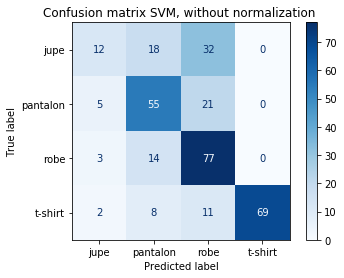



              precision    recall  f1-score   support

           0       0.55      0.19      0.29        62
           1       0.58      0.68      0.63        81
           2       0.55      0.82      0.66        94
           3       1.00      0.77      0.87        90

    accuracy                           0.65       327
   macro avg       0.67      0.61      0.61       327
weighted avg       0.68      0.65      0.64       327

------------------------------------


In [192]:
clf_name='SVM'
clf=models[clf_name]               
accuracy_summary,cv_score_summary = Modelisation_and_prediction(clf, clf_name, HOG_X_train, HOG_y_train, HOG_X_test, HOG_y_test, target_name_list)